In [7]:
import pandas as pd

file_name = 'online_retail.xlsx'

xls = pd.ExcelFile(file_name)
print(xls.sheet_names)

df = pd.read_excel(xls, sheet_name='Online Retail')
df.head(5)


['Online Retail']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
print("=== JUMLAH BARIS DAN KOLOM ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


print("\n=== NAMA-NAMA KOLOM ===")
print(df.columns.tolist())


print("\n=== INFORMASI DATAFRAME ===")
df.info()


print("\n=== JUMLAH BARIS DUPLIKAT ===")
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris yang duplikat: {jumlah_duplikat}")


print("\n=== CONTOH BARIS DUPLIKAT (Jika ada) ===")
if jumlah_duplikat > 0:
    display(df[df.duplicated()].head(10))
else:
    print("Tidak ada baris duplikat.")

=== JUMLAH BARIS DAN KOLOM ===
Jumlah baris: 541909
Jumlah kolom: 8

=== NAMA-NAMA KOLOM ===
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

=== INFORMASI DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

=== JUMLAH BARIS DUPLIKAT ===
Jumlah baris yang duplikat: 5268

=== CONTOH BAR

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


In [9]:
# Buang Data yang Tidak Valid
# Hapus CustomerID yang kosong, dan Quantity/UnitPrice yang ≤ 0:
# Hapus baris tanpa CustomerID
df = df.dropna(subset=['CustomerID'])

# Hapus Quantity dan UnitPrice yang negatif atau nol
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
37411,539464,84247E,PACK/12 XMAS FUN CARD,1,2010-12-19 11:35:00,2.95,17913.0,United Kingdom
37713,539475,22274,FELTCRAFT DOLL EMILY,1,2010-12-19 14:41:00,2.95,16686.0,United Kingdom
486239,577721,22784,LANTERN CREAM GAZEBO,3,2011-11-21 12:24:00,4.95,13167.0,United Kingdom
28527,538641,21452,TOADSTOOL MONEY BOX,12,2010-12-13 14:36:00,2.95,15640.0,United Kingdom
117427,546387,22980,PANTRY SCRUBBING BRUSH,24,2011-03-11 13:34:00,1.65,16766.0,United Kingdom
102434,545021,21754,HOME BUILDING BLOCK WORD,6,2011-02-25 14:11:00,5.95,17663.0,United Kingdom
522777,580468,35970,ZINC FOLKART SLEIGH BELLS,2,2011-12-04 12:31:00,1.69,12748.0,United Kingdom
483187,577495,35961,FOLKART ZINC HEART CHRISTMAS DEC,2,2011-11-20 12:20:00,0.85,14704.0,United Kingdom
79201,542919,85099B,JUMBO BAG RED RETROSPOT,100,2011-02-01 16:47:00,1.95,15971.0,United Kingdom
409854,572076,23534,STOP FOR TEA WALL ART,3,2011-10-20 14:01:00,5.95,13761.0,United Kingdom


In [10]:
# Jumlah baris dan kolom setelah dibersihkan
print("\n=== INFORMASI DATASET SETELAH DIBERSIHKAN ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Nama-nama kolom
print("\n=== NAMA NAMA KOLOM ===")
print(df.columns.tolist())

# Info tipe data dan non-null
print("\n=== TIPE DATA DAN NOT NULL ===")
df.info()

# Jumlah baris yang duplikat setelah pembersihan
print("\n=== JUMLAH BARIS DUPLIKAT ===")
jumlah_duplikat_baru = df.duplicated().sum()
print(f"Jumlah baris yang duplikat: {jumlah_duplikat_baru}")

# Contoh baris duplikat (jika ada)
print("\n=== BARIS DUPLIKATNYA ===")
if jumlah_duplikat_baru > 0:
    print("Contoh baris yang duplikat:")
    display(df[df.duplicated()].head())
else:
    print("Tidak ada baris duplikat setelah dibersihkan.")


=== INFORMASI DATASET SETELAH DIBERSIHKAN ===
Jumlah baris: 397884
Jumlah kolom: 8

=== NAMA NAMA KOLOM ===
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

=== TIPE DATA DAN NOT NULL ===
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB

=== JUMLAH BARIS DUPLIKAT ===
Jumlah baris yang duplikat: 5192



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [ ]:
# Buat Kolom TotalPrice
# Hitung total pembelian untuk setiap baris:
# Buat kolom TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df[['CustomerID', 'Quantity', 'UnitPrice', 'TotalPrice']].head(10)

,CustomerID,Quantity,UnitPrice,TotalPrice
0,17850.0,6,2.55,15.30
1,17850.0,6,3.39,20.34
2,17850.0,8,2.75,22.00
3,17850.0,6,3.39,20.34
4,17850.0,6,3.39,20.34
5,17850.0,2,7.65,15.30
6,17850.0,6,4.25,25.50
7,17850.0,6,1.85,11.10
8,17850.0,6,1.85,11.10
9,13047.0,32,1.69,54.08


In [12]:
# Agregasi per Customer
# Kelompokkan berdasarkan CustomerID untuk buat data clustering:
# Gabungkan berdasarkan CustomerID
df_grouped = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Rename kolom biar lebih jelas
df_grouped.columns = ['CustomerID', 'TotalQuantity', 'TotalSpending']

df_grouped.head(10)

,CustomerID,TotalQuantity,TotalSpending
0,12346.0,74215,77183.60
1,12347.0,2458,4310.00
2,12348.0,2341,1797.24
3,12349.0,631,1757.55
4,12350.0,197,334.40
5,12352.0,536,2506.04
6,12353.0,20,89.00
7,12354.0,530,1079.40
8,12355.0,240,459.40
9,12356.0,1591,2811.43


In [13]:
# Langkah 2: Normalisasi Data
# Tujuannya biar nilai TotalQuantity dan TotalSpending punya skala yang sama sebelum clustering.
from sklearn.preprocessing import StandardScaler

# Pisahkan kolom fitur saja (tanpa CustomerID)
X = df_grouped[['TotalQuantity', 'TotalSpending']]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/azizfrachman/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azizfrachman/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azizfrachman/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azizfrachman/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/cluster/

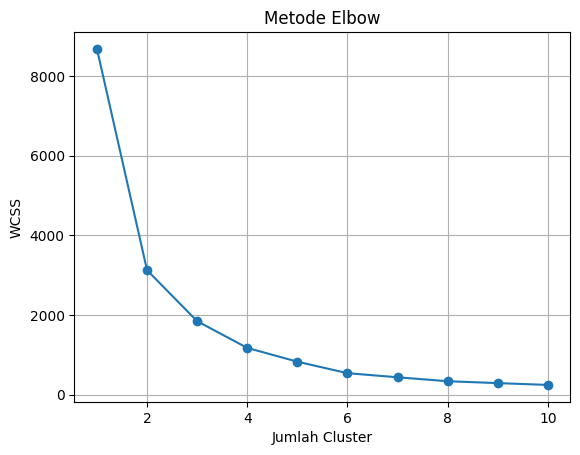

In [14]:
# Langkah 3: Menentukan Jumlah Cluster (Elbow Method)
# Ini untuk tahu berapa jumlah cluster terbaik sebelum pakai K-Means.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # within-cluster sum of squares

# Coba untuk jumlah cluster 1 sampai 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [15]:
# Langkah 4: Jalankan K-Means
# Misalnya setelah lihat elbow grafik Mas pilih 3 cluster:
# Inisialisasi dan fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tambahkan hasil cluster ke dataframe
df_grouped['Cluster'] = clusters

df_grouped.head(10)

/Users/azizfrachman/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,TotalQuantity,TotalSpending,Cluster
0,12346.0,74215,77183.60,2
1,12347.0,2458,4310.00,0
2,12348.0,2341,1797.24,0
3,12349.0,631,1757.55,0
4,12350.0,197,334.40,0
5,12352.0,536,2506.04,0
6,12353.0,20,89.00,0
7,12354.0,530,1079.40,0
8,12355.0,240,459.40,0
9,12356.0,1591,2811.43,0


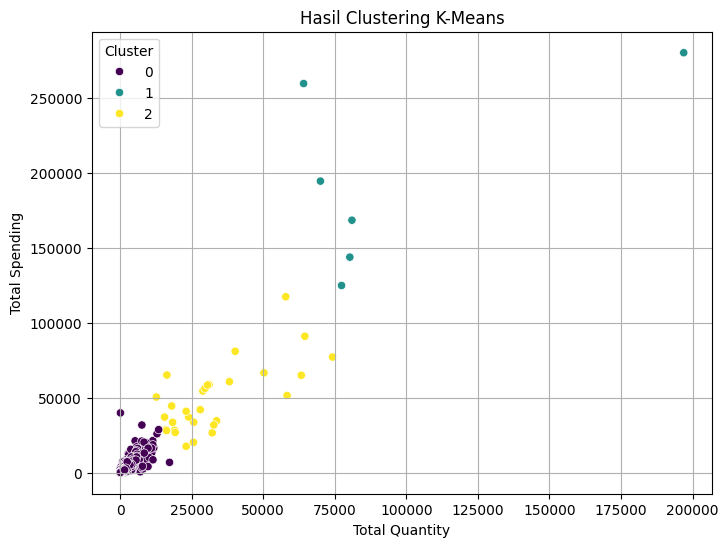

In [16]:
# Langkah 5: Visualisasi Hasil Clustering
# Supaya lebih paham hasil clusteringnya:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_grouped,
    x='TotalQuantity',
    y='TotalSpending',
    hue='Cluster',
    palette='viridis'
)
plt.title('Hasil Clustering K-Means')
plt.xlabel('Total Quantity')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

In [17]:
# Evaluasi Kinerja Clustering (Opsional)
# Gunakan Silhouette Score untuk melihat seberapa baik hasil clustering:

from sklearn.metrics import silhouette_score
score = silhouette_score(X, df_grouped['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.956148803585764


In [18]:
# Simpan hasil clustering ke file baru Excel
df_grouped.to_excel('hasil_clustering_online_retail.xlsx', index=False)

/var/folders/2c/2t0cpt0s69n96kxm0swbgt8w0000gp/T/ipykernel_4404/2108461570.py:2: UserWarning: Pandas requires version '3.0.3' or newer of 'xlsxwriter' (version '3.0.2' currently installed).
  df_grouped.to_excel('hasil_clustering_online_retail.xlsx', index=False)
